Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Initial dataset size: 10356849
Number of sample points used for homology: 1000


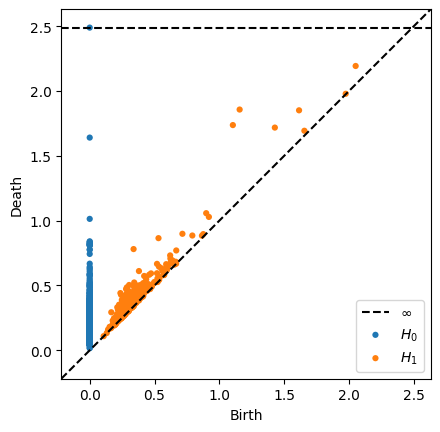

In [ ]:
!pip install ripser
!pip install persim
!pip install networkx
!pip install scikit-learn
!pip install matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams
from scipy.spatial.distance import pdist, squareform
import networkx as nx
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

def split_large_component(component_indices, points, max_size):
    """
    Given a set of indices for a large connected component,
    split it into smaller clusters so that each resulting cluster has at most max_size points.
    """
    component_indices = np.array(list(component_indices))
    num_points = len(component_indices)
    n_clusters = int(np.ceil(num_points / max_size))
    component_points = points[component_indices]
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    sub_labels = kmeans.fit_predict(component_points)
    new_clusters = []
    for cl in np.unique(sub_labels):
        indices = component_indices[sub_labels == cl]
        new_clusters.append(set(indices))
    return new_clusters

# Load the dataset
!pip install tables
from google.colab import drive
drive.mount('/content/drive')

sample_file = '/content/drive/MyDrive/Glider data/glider_data.h5'
df = pd.read_hdf(sample_file)
print("Initial dataset size:", df.shape[0])

from sklearn.preprocessing import StandardScaler

# For the sample, we use 5000 rows
df_sample = df.sample(n=1000, random_state=42)
df_sample = df_sample.dropna()
df_sample = df_sample.drop(columns=['time'], errors='ignore')

# Remove the oxygen column because it is our dependent variable.
if 'oxygen' in df_sample.columns:
    df_sample = df_sample.drop(columns=['oxygen'])

# Select only the features for topology: latitude, longitude, and depth.
# (Adjust the order if desired; here we assume columns are named exactly.)
required_features = ['latitude', 'longitude', 'depth', 'salinity', 'density', 'temperature']
if not all(col in df_sample.columns for col in required_features):
    raise ValueError(f"One or more required columns {required_features} not found in the sample data.")

df_features = df_sample[required_features]
scaler = StandardScaler()
points = scaler.fit_transform(df_features.values)
n_points = points.shape[0]
print("Number of sample points used for homology:", n_points)

result = ripser(points, maxdim=1)
diagrams = result['dgms']
plot_diagrams(diagrams, show=True)

In [ ]:
threshold_input = input("The persistence diagram is displayed.\nEnter connectivity threshold (e.g., 15): ")
try:
    threshold = float(threshold_input)
except ValueError:
    print("Invalid input. Using default threshold of 15")
    threshold = 15.0
print("Chosen connectivity threshold (epsilon):", threshold)

The persistence diagram is displayed.
Enter connectivity threshold (e.g., 15): 1.5
Chosen connectivity threshold (epsilon): 1.5


Number of connected components before splitting: 2
Number of components after splitting: 16
Median cluster size: 58.5
Merging clusters smaller than: 29.25
Merging small cluster 12 (size 11) into cluster 3 (size 92)
Merging small cluster 15 (size 1) into cluster 2 (size 38)
Full dataset shape before cleaning: (10356849, 8)
Full dataset shape after cleaning: (10356849, 7)
Full dataset cluster assignment complete.
Cluster label counts: {np.int64(-1): np.int64(2130), np.int64(0): np.int64(1413006), np.int64(1): np.int64(664205), np.int64(2): np.int64(498649), np.int64(3): np.int64(910413), np.int64(4): np.int64(804004), np.int64(5): np.int64(708115), np.int64(6): np.int64(544143), np.int64(7): np.int64(390431), np.int64(8): np.int64(549094), np.int64(9): np.int64(603233), np.int64(10): np.int64(651085), np.int64(11): np.int64(767171), np.int64(13): np.int64(508369), np.int64(14): np.int64(1342801)}


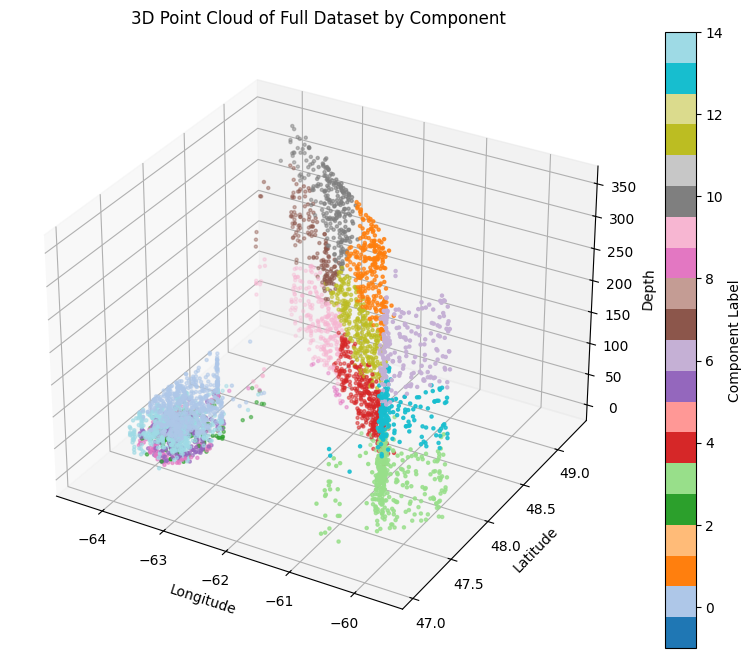

Saved cluster 0 with 1413006 points to component_0.h5
Saved cluster 1 with 664205 points to component_1.h5
Saved cluster 2 with 498649 points to component_2.h5
Saved cluster 3 with 910413 points to component_3.h5
Saved cluster 4 with 804004 points to component_4.h5
Saved cluster 5 with 708115 points to component_5.h5
Saved cluster 6 with 544143 points to component_6.h5
Saved cluster 7 with 390431 points to component_7.h5
Saved cluster 8 with 549094 points to component_8.h5
Saved cluster 9 with 603233 points to component_9.h5
Saved cluster 10 with 651085 points to component_10.h5
Saved cluster 11 with 767171 points to component_11.h5
Saved cluster 13 with 508369 points to component_12.h5
Saved cluster 14 with 1342801 points to component_13.h5
Binned Data (first few voxels):
       voxel      oxygen  longitude   latitude      depth
0  (0, 7, 3)  241.523331 -64.277855  47.668095  36.130638
1  (0, 7, 4)  239.630798 -64.277863  47.668259  39.318195
2  (0, 7, 5)  240.625549 -64.279022  47.66

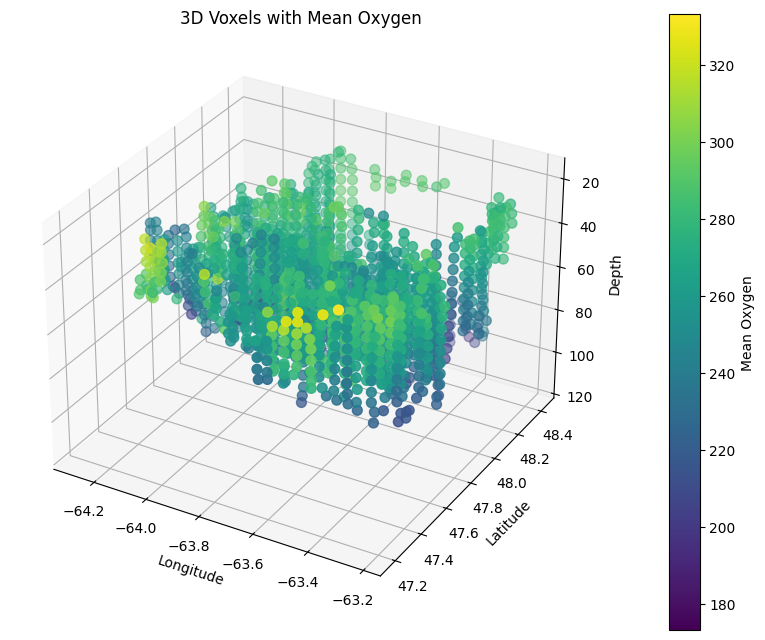

Folder already exists: /content/drive/My Drive/Glider data/dim_bins10
Binned Data (first few voxels):
       voxel      oxygen  longitude   latitude      depth
0  (0, 2, 1)  317.041016 -64.222824  47.528473  34.702213
1  (0, 2, 2)  312.906281 -64.214394  47.517872  41.536636
2  (0, 2, 3)  284.121857 -64.212669  47.504116  52.642147
3  (0, 2, 4)  281.053314 -64.216309  47.509235  57.005909
4  (0, 3, 1)  241.523331 -64.277855  47.668095  36.130638


<ipython-input-5-cb82c3df4104>:271: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['voxel'], dtype='object')]

  voxel_grouped.to_hdf(output_file, key='data', mode='w')


Processed data saved as: component_0_binned_354.h5 with 354 data points
Binned data saved as: /content/drive/MyDrive/Glider data/dim_bins10/component_0_binned_354.h5
The file exists at: /content/drive/MyDrive/Glider data/dim_bins10/component_0_binned_354.h5
Binned Data (first few voxels):
       voxel      oxygen  longitude   latitude       depth
0  (0, 8, 2)   76.859291 -62.118778  48.515667  225.613083
1  (0, 8, 3)   76.610008 -62.125172  48.514912  236.689468
2  (0, 8, 4)   73.303391 -62.125164  48.514969  255.234253
3  (0, 8, 5)   70.970482 -62.125641  48.514946  267.873810
4  (0, 9, 2)  102.911018 -62.136520  48.530090  224.775894


<ipython-input-5-cb82c3df4104>:271: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['voxel'], dtype='object')]

  voxel_grouped.to_hdf(output_file, key='data', mode='w')


Processed data saved as: component_1_binned_203.h5 with 203 data points
Binned data saved as: /content/drive/MyDrive/Glider data/dim_bins10/component_1_binned_203.h5
The file exists at: /content/drive/MyDrive/Glider data/dim_bins10/component_1_binned_203.h5
Binned Data (first few voxels):
       voxel      oxygen  longitude   latitude      depth
0  (0, 2, 0)  246.886200 -64.207779  47.498619   1.306821
1  (0, 2, 1)  242.327240 -64.203430  47.498856   4.745541
2  (0, 2, 2)  239.443192 -64.195625  47.498966   7.573064
3  (0, 2, 3)  234.815369 -64.193268  47.515400  10.961160
4  (0, 2, 4)  235.328873 -64.194511  47.509998  13.897989


<ipython-input-5-cb82c3df4104>:271: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['voxel'], dtype='object')]

  voxel_grouped.to_hdf(output_file, key='data', mode='w')


Processed data saved as: component_2_binned_373.h5 with 373 data points
Binned data saved as: /content/drive/MyDrive/Glider data/dim_bins10/component_2_binned_373.h5
The file exists at: /content/drive/MyDrive/Glider data/dim_bins10/component_2_binned_373.h5
Binned Data (first few voxels):
       voxel      oxygen  longitude   latitude      depth
0  (0, 9, 0)  269.065552 -62.156868  48.553387   6.656392
1  (0, 9, 1)  263.601135 -62.123909  48.531406  20.840551
2  (1, 8, 0)  283.838409 -61.828728  48.412964   4.885723
3  (1, 8, 1)  285.735107 -61.820671  48.406734  18.152506
4  (1, 9, 0)  279.723053 -61.953342  48.466900   5.198689


<ipython-input-5-cb82c3df4104>:271: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['voxel'], dtype='object')]

  voxel_grouped.to_hdf(output_file, key='data', mode='w')


Processed data saved as: component_3_binned_165.h5 with 165 data points
Binned data saved as: /content/drive/MyDrive/Glider data/dim_bins10/component_3_binned_165.h5
The file exists at: /content/drive/MyDrive/Glider data/dim_bins10/component_3_binned_165.h5
Binned Data (first few voxels):
       voxel      oxygen  longitude   latitude      depth
0  (0, 8, 1)  264.196411 -62.460846  48.651447  24.975142
1  (0, 8, 2)  274.438416 -62.458576  48.650227  35.871819
2  (0, 8, 3)  273.411133 -62.458763  48.649681  49.796074
3  (0, 8, 4)  271.019958 -62.459248  48.649853  61.241364
4  (0, 8, 5)  266.720795 -62.457714  48.646378  78.029305


<ipython-input-5-cb82c3df4104>:271: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['voxel'], dtype='object')]

  voxel_grouped.to_hdf(output_file, key='data', mode='w')


Processed data saved as: component_4_binned_212.h5 with 212 data points
Binned data saved as: /content/drive/MyDrive/Glider data/dim_bins10/component_4_binned_212.h5
The file exists at: /content/drive/MyDrive/Glider data/dim_bins10/component_4_binned_212.h5
Binned Data (first few voxels):
       voxel      oxygen  longitude   latitude      depth
0  (0, 4, 0)  289.410583 -64.408333  47.660492   2.766659
1  (0, 4, 2)  250.756348 -64.382759  47.661427  19.340527
2  (0, 4, 3)  253.675034 -64.390671  47.660522  24.455502
3  (0, 4, 4)  260.485199 -64.387741  47.660580  30.099661
4  (1, 2, 0)  296.389709 -64.203110  47.501865   4.352684


<ipython-input-5-cb82c3df4104>:271: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['voxel'], dtype='object')]

  voxel_grouped.to_hdf(output_file, key='data', mode='w')


Processed data saved as: component_5_binned_275.h5 with 275 data points
Binned data saved as: /content/drive/MyDrive/Glider data/dim_bins10/component_5_binned_275.h5
The file exists at: /content/drive/MyDrive/Glider data/dim_bins10/component_5_binned_275.h5
Binned Data (first few voxels):
       voxel      oxygen  longitude   latitude       depth
0  (0, 9, 5)   85.056229 -60.799004  47.986423  280.050964
1  (0, 9, 6)   91.767052 -60.833164  48.003437  294.909332
2  (0, 9, 7)   96.997009 -60.858356  48.015083  310.693359
3  (0, 9, 8)   99.624168 -60.853996  48.012951  329.263336
4  (0, 9, 9)  101.377693 -60.846939  48.009785  346.825806


<ipython-input-5-cb82c3df4104>:271: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['voxel'], dtype='object')]

  voxel_grouped.to_hdf(output_file, key='data', mode='w')


Processed data saved as: component_6_binned_235.h5 with 235 data points
Binned data saved as: /content/drive/MyDrive/Glider data/dim_bins10/component_6_binned_235.h5
The file exists at: /content/drive/MyDrive/Glider data/dim_bins10/component_6_binned_235.h5
Binned Data (first few voxels):
       voxel      oxygen  longitude   latitude       depth
0  (0, 5, 1)  113.875229 -64.263313  49.003838  145.854401
1  (0, 5, 2)  101.737717 -64.259590  49.003506  158.653259
2  (0, 5, 3)   78.280037 -64.259720  49.003620  176.587112
3  (0, 5, 4)   69.571068 -64.257912  49.003521  191.619705
4  (0, 6, 1)  116.957077 -64.269318  49.027950  147.010620


<ipython-input-5-cb82c3df4104>:271: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['voxel'], dtype='object')]

  voxel_grouped.to_hdf(output_file, key='data', mode='w')


Processed data saved as: component_7_binned_204.h5 with 204 data points
Binned data saved as: /content/drive/MyDrive/Glider data/dim_bins10/component_7_binned_204.h5
The file exists at: /content/drive/MyDrive/Glider data/dim_bins10/component_7_binned_204.h5
Binned Data (first few voxels):
       voxel      oxygen  longitude   latitude      depth
0  (0, 1, 0)  251.409332 -64.205338  47.488251   4.721247
1  (0, 1, 1)  249.487976 -64.203667  47.484451   9.229897
2  (0, 1, 2)  237.436127 -64.184303  47.524532  17.113810
3  (0, 1, 3)  238.808640 -64.181618  47.528858  21.978712
4  (0, 2, 0)  245.513046 -64.296394  47.681889   2.853244


<ipython-input-5-cb82c3df4104>:271: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['voxel'], dtype='object')]

  voxel_grouped.to_hdf(output_file, key='data', mode='w')


Processed data saved as: component_8_binned_157.h5 with 157 data points
Binned data saved as: /content/drive/MyDrive/Glider data/dim_bins10/component_8_binned_157.h5
The file exists at: /content/drive/MyDrive/Glider data/dim_bins10/component_8_binned_157.h5
Binned Data (first few voxels):
       voxel      oxygen  longitude   latitude      depth
0  (0, 7, 0)  244.677032 -64.194351  49.021858   7.862679
1  (0, 7, 1)  240.942474 -64.231407  49.014927  28.229866
2  (0, 7, 2)  235.386307 -64.223488  49.016850  46.210922
3  (0, 7, 3)  238.318604 -64.216698  49.018154  63.889263
4  (0, 7, 4)  245.862015 -64.221039  49.017368  82.323303


<ipython-input-5-cb82c3df4104>:271: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['voxel'], dtype='object')]

  voxel_grouped.to_hdf(output_file, key='data', mode='w')


Processed data saved as: component_9_binned_207.h5 with 207 data points
Binned data saved as: /content/drive/MyDrive/Glider data/dim_bins10/component_9_binned_207.h5
The file exists at: /content/drive/MyDrive/Glider data/dim_bins10/component_9_binned_207.h5
Binned Data (first few voxels):
       voxel     oxygen  longitude   latitude       depth
0  (0, 7, 5)  56.637428 -64.044090  49.058861  285.852631
1  (0, 7, 6)  57.141926 -64.130165  49.046463  297.229645
2  (0, 7, 7)  63.064758 -64.024292  49.061348  314.227081
3  (0, 7, 8)  64.541489 -64.024460  49.061344  323.328552
4  (1, 7, 5)  59.534798 -63.988659  49.093742  282.619324


<ipython-input-5-cb82c3df4104>:271: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['voxel'], dtype='object')]

  voxel_grouped.to_hdf(output_file, key='data', mode='w')


Processed data saved as: component_10_binned_176.h5 with 176 data points
Binned data saved as: /content/drive/MyDrive/Glider data/dim_bins10/component_10_binned_176.h5
The file exists at: /content/drive/MyDrive/Glider data/dim_bins10/component_10_binned_176.h5
Binned Data (first few voxels):
       voxel      oxygen  longitude   latitude       depth
0  (0, 8, 3)  168.798340 -62.698341  48.746510  136.273438
1  (0, 8, 4)  158.863297 -62.698132  48.746777  148.529053
2  (0, 8, 5)  147.776917 -62.698864  48.746128  160.075119
3  (0, 8, 6)  194.501343 -62.688816  48.756702  172.488510
4  (0, 9, 3)  172.000595 -62.738457  48.772224  138.597153


<ipython-input-5-cb82c3df4104>:271: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['voxel'], dtype='object')]

  voxel_grouped.to_hdf(output_file, key='data', mode='w')


Processed data saved as: component_11_binned_202.h5 with 202 data points
Binned data saved as: /content/drive/MyDrive/Glider data/dim_bins10/component_11_binned_202.h5
The file exists at: /content/drive/MyDrive/Glider data/dim_bins10/component_11_binned_202.h5
Binned Data (first few voxels):
       voxel      oxygen  longitude   latitude       depth
0  (0, 9, 3)  130.945389 -60.906902  48.036938  140.571686
1  (0, 9, 4)  114.493721 -60.911247  48.039795  150.424591
2  (0, 9, 5)  123.117027 -60.954437  48.056023  166.063156
3  (0, 9, 6)  145.276520 -60.975861  48.071400  176.414886
4  (1, 8, 3)  143.074982 -60.781944  47.984329  138.022308


<ipython-input-5-cb82c3df4104>:271: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['voxel'], dtype='object')]

  voxel_grouped.to_hdf(output_file, key='data', mode='w')


Processed data saved as: component_12_binned_208.h5 with 208 data points
Binned data saved as: /content/drive/MyDrive/Glider data/dim_bins10/component_12_binned_208.h5
The file exists at: /content/drive/MyDrive/Glider data/dim_bins10/component_12_binned_208.h5
Binned Data (first few voxels):
       voxel      oxygen  longitude   latitude      depth
0  (0, 3, 0)  288.581909 -64.360756  47.627163   4.643981
1  (0, 3, 1)  288.510590 -64.356804  47.624649  11.587851
2  (0, 3, 2)  288.464874 -64.357994  47.625404  19.258600
3  (0, 3, 3)  287.539062 -64.354729  47.624874  26.964199
4  (0, 3, 4)  284.150146 -64.342606  47.621319  34.247025


<ipython-input-5-cb82c3df4104>:271: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['voxel'], dtype='object')]

  voxel_grouped.to_hdf(output_file, key='data', mode='w')


Processed data saved as: component_13_binned_394.h5 with 394 data points
Binned data saved as: /content/drive/MyDrive/Glider data/dim_bins10/component_13_binned_394.h5
The file exists at: /content/drive/MyDrive/Glider data/dim_bins10/component_13_binned_394.h5


In [ ]:
dist_matrix = squareform(pdist(points))
G = nx.Graph()
G.add_nodes_from(range(n_points))
for i in range(n_points):
    for j in range(i + 1, n_points):
        if dist_matrix[i, j] <= threshold:
            G.add_edge(i, j)

components = list(nx.connected_components(G))
print("Number of connected components before splitting:", len(components))

max_size = len(df_sample) / 15  # Adjust this factor as needed.
new_components = []
for comp in components:
    if len(comp) > max_size:
        split_comps = split_large_component(comp, points, max_size)
        new_components.extend(split_comps)
    else:
        new_components.append(comp)
print("Number of components after splitting:", len(new_components))

labels = np.empty(n_points, dtype=int)
for label, comp in enumerate(new_components):
    for idx in comp:
        labels[idx] = label

# Merge clusters that are very small relative to the median cluster size.
cluster_sizes = np.array([len(comp) for comp in new_components])
median_size = np.median(cluster_sizes)
min_size_threshold = 0.5 * median_size  # Merge clusters smaller than 50% of median size.
print("Median cluster size:", median_size)
print("Merging clusters smaller than:", min_size_threshold)

num_clusters = len(new_components)
# Compute centroids for each cluster (using the sample points)
centroids = np.zeros((num_clusters, points.shape[1]))
for i, comp in enumerate(new_components):
    comp_indices = list(comp)
    centroids[i] = np.mean(points[comp_indices], axis=0)

# For each cluster that is too small, merge it into the nearest cluster (by centroid distance)
for i in range(num_clusters):
    if cluster_sizes[i] < min_size_threshold:
        distances = np.linalg.norm(centroids[i] - centroids, axis=1)
        distances[i] = np.inf  # ignore self-distance
        nearest = np.argmin(distances)
        print(f"Merging small cluster {i} (size {cluster_sizes[i]}) into cluster {nearest} (size {cluster_sizes[nearest]})")
        labels[labels == i] = nearest


# Load and preprocess the full dataset.
df_full = pd.read_hdf(sample_file)
print("Full dataset shape before cleaning:", df_full.shape)
df_full = df_full.dropna()
df_full = df_full.drop(columns=['time'], errors='ignore')
print("Full dataset shape after cleaning:", df_full.shape)

# For cluster assignment, use only latitude, longitude, and depth features.
if not all(col in df_full.columns for col in required_features):
    raise ValueError(f"One or more required columns {required_features} not found in the full dataset.")

df_full_features = df_full[required_features]
full_points = scaler.transform(df_full_features.values)

# Build a nearest neighbor model using the sample points (with topology clusters)
nbrs = NearestNeighbors(n_neighbors=1, algorithm='auto').fit(points)
distances, indices = nbrs.kneighbors(full_points)
distances = distances.flatten()
indices = indices.flatten()

# For each full dataset point, if its nearest sample point is within the threshold,
# assign the corresponding (merged) cluster label; otherwise, mark as noise (-1).
full_labels = np.where(distances <= threshold, labels[indices], -1)
df_full['component_label'] = full_labels

print("Full dataset cluster assignment complete.")
print("Cluster label counts:", dict(zip(*np.unique(full_labels, return_counts=True))))


# Here we use latitude, longitude, and depth for a 3D plot.
df_full_sample = df_full.sample(n=4000, random_state=42)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_full_sample['longitude'], df_full_sample['latitude'], df_full_sample['depth'],
                c=df_full_sample['component_label'], cmap='tab20', s=5)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Depth')
plt.title("3D Point Cloud of Full Dataset by Component")
plt.colorbar(sc, label='Component Label')
plt.show()


unique_clusters = np.unique(full_labels)
unique_clusters = unique_clusters[1:]
count = 0

# Do not include outlier (-1)
for cluster in unique_clusters:
    subset = df_full[df_full['component_label'] == cluster]
    filename = f"component_{count}.h5"
    subset.to_hdf(filename, key='df', mode='w')
    print(f"Saved cluster {cluster} with {len(subset)} points to {filename}")
    destination = f"/content/drive/MyDrive/Glider data/{filename}"
    !mv "/content/{filename}" "{destination}"
    count += 1


####################################################

# BINNING

import numpy as np
import pandas as pd
!pip install tables

# Ensure your dataset has a "depth" column along with "longitude" and "latitude"
# If not, you'll need to add it before running the following code.

# Example: Load your data (adjust the path as needed)
#from google.colab import drive
#drive.mount('/content/drive')
df = pd.read_hdf('/content/drive/MyDrive/Glider data/component_0.h5')

# For demonstration, let's assume you also have a 'depth' column
# If depth is not available, you'll need to include it or compute it from other information
if 'depth' not in df.columns:
    raise ValueError("The DataFrame must contain a 'depth' column for voxel binning.")

# Define the number of bins for each dimension (adjust as needed)
numbins = 20
num_lon_bins = numbins
num_lat_bins = numbins
num_depth_bins = numbins

# Compute bin edges using np.linspace based on the min and max of each variable
lon_bins = np.linspace(df['longitude'].min(), df['longitude'].max(), num_lon_bins + 1)
lat_bins = np.linspace(df['latitude'].min(), df['latitude'].max(), num_lat_bins + 1)
depth_bins = np.linspace(df['depth'].min(), df['depth'].max(), num_depth_bins + 1)

# Create new columns that assign each row to a bin index (0-based)
df['lon_bin'] = pd.cut(df['longitude'], bins=lon_bins, labels=False, include_lowest=True)
df['lat_bin'] = pd.cut(df['latitude'], bins=lat_bins, labels=False, include_lowest=True)
df['depth_bin'] = pd.cut(df['depth'], bins=depth_bins, labels=False, include_lowest=True)

# Create a voxel identifier as a tuple of (lon_bin, lat_bin, depth_bin)
df['voxel'] = list(zip(df['lon_bin'], df['lat_bin'], df['depth_bin']))

# Group the data by voxel and compute aggregate statistics, e.g., mean oxygen value
voxel_grouped = df.groupby('voxel').agg({
    'oxygen': 'mean',
    'longitude': 'mean',
    'latitude': 'mean',
    'depth': 'mean'
}).reset_index()

print("Binned Data (first few voxels):")
print(voxel_grouped.head())



import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting
import os
import shutil

# Assuming you have 'voxel_grouped' DataFrame from the previous binning code

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot: x=longitude, y=latitude, z=depth, colored by mean oxygen
sc = ax.scatter(voxel_grouped['longitude'], voxel_grouped['latitude'],
                voxel_grouped['depth'], c=voxel_grouped['oxygen'], cmap='viridis', s=50)

# Add color bar to indicate oxygen levels
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Mean Oxygen')

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("Depth")
ax.set_title("3D Voxels with Mean Oxygen")

# Optionally, if depth is measured as a positive value going downward, you might want to invert the z-axis
ax.invert_zaxis()

plt.show()
voxel_grouped.shape


def bin_glider_data(input_file, dim_bins = 10):

    # Ensure your dataset has a "depth" column along with "longitude" and "latitude"
    # If not, you'll need to add it before running the following code.

    # Example: Load your data (adjust the path as needed)
    #from google.colab import drive
    #drive.mount('/content/drive')
    df = pd.read_hdf(input_file)


    num_lon_bins = dim_bins * 1
    num_lat_bins = dim_bins * 1
    num_depth_bins = dim_bins * 1

    # For demonstration, let's assume you also have a 'depth' column
    # If depth is not available, you'll need to include it or compute it from other information
    if 'depth' not in df.columns:
        raise ValueError("The DataFrame must contain a 'depth' column for voxel binning.")

    # Compute bin edges using np.linspace based on the min and max of each variable
    lon_bins = np.linspace(df['longitude'].min(), df['longitude'].max(), num_lon_bins + 1)
    lat_bins = np.linspace(df['latitude'].min(), df['latitude'].max(), num_lat_bins + 1)
    depth_bins = np.linspace(df['depth'].min(), df['depth'].max(), num_depth_bins + 1)

    # Create new columns that assign each row to a bin index (0-based)
    df['lon_bin'] = pd.cut(df['longitude'], bins=lon_bins, labels=False, include_lowest=True)
    df['lat_bin'] = pd.cut(df['latitude'], bins=lat_bins, labels=False, include_lowest=True)
    df['depth_bin'] = pd.cut(df['depth'], bins=depth_bins, labels=False, include_lowest=True)

    # Create a voxel identifier as a tuple of (lon_bin, lat_bin, depth_bin)
    df['voxel'] = list(zip(df['lon_bin'], df['lat_bin'], df['depth_bin']))

    # Group the data by voxel and compute aggregate statistics, e.g., mean oxygen value
    voxel_grouped = df.groupby('voxel').agg({
        'oxygen': 'mean',
        'longitude': 'mean',
        'latitude': 'mean',
        'depth': 'mean'
    }).reset_index()

    print("Binned Data (first few voxels):")
    print(voxel_grouped.head())

    df = pd.read_hdf(input_file)

    # For demonstration, let's assume you also have a 'depth' column
    # If depth is not available, you'll need to include it or compute it from other information
    if 'depth' not in df.columns:
        raise ValueError("The DataFrame must contain a 'depth' column for voxel binning.")

    # Compute bin edges using np.linspace based on the min and max of each variable
    lon_bins = np.linspace(df['longitude'].min(), df['longitude'].max(), num_lon_bins + 1)
    lat_bins = np.linspace(df['latitude'].min(), df['latitude'].max(), num_lat_bins + 1)
    depth_bins = np.linspace(df['depth'].min(), df['depth'].max(), num_depth_bins + 1)

    # Create new columns that assign each row to a bin index (0-based)
    df['lon_bin'] = pd.cut(df['longitude'], bins=lon_bins, labels=False, include_lowest=True)
    df['lat_bin'] = pd.cut(df['latitude'], bins=lat_bins, labels=False, include_lowest=True)
    df['depth_bin'] = pd.cut(df['depth'], bins=depth_bins, labels=False, include_lowest=True)

    # Create a voxel identifier as a tuple of (lon_bin, lat_bin, depth_bin)
    df['voxel'] = list(zip(df['lon_bin'], df['lat_bin'], df['depth_bin']))

    # Group the data by voxel and compute aggregate statistics, e.g., mean oxygen value
    voxel_grouped = df.groupby('voxel').agg({
        'oxygen': 'mean',
        'longitude': 'mean',
        'latitude': 'mean',
        'depth': 'mean'
    }).reset_index()


    # Generate output filename
    num_voxels = voxel_grouped.shape[0]
    base_name = os.path.splitext(os.path.basename(input_file))[0]
    output_file = f"{base_name}_binned_{num_voxels}.h5"

    # Save the processed data
    voxel_grouped.to_hdf(output_file, key='data', mode='w')

    print(f"Processed data saved as: {output_file} with {num_voxels} data points")
    return output_file


def process_multiple_files(file_paths, output_directory, dim_bins):
    for input_file in file_paths:

        # Run the binning function for each file
        binned_file = bin_glider_data(input_file, dim_bins)

        # Correct the directory where the file should be saved
        final_binned_file = os.path.join(output_directory, os.path.basename(binned_file))

        # Rename or move the file to the correct directory on Drive
        shutil.move(binned_file, final_binned_file)

        # Print the final saved path
        print(f"Binned data saved as: {final_binned_file}")

        # Check if the file exists at the given path
        if os.path.exists(final_binned_file):
            print(f"The file exists at: {final_binned_file}")
        else:
            print(f"File not found at: {final_binned_file}")

# Generate the list of input files for components 0 to 14
input_files = [f"/content/drive/MyDrive/Glider data/component_{i}.h5" for i in range(14)]

# Dimension factor used to scale bin sizes
dim_bins = 10

# Generate folder if it does not exist yet
folder_path = f"/content/drive/My Drive/Glider data/dim_bins{dim_bins}"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Folder created at: {folder_path}")
else:
    print(f"Folder already exists: {folder_path}")

# Directory where binned files will be saved
output_directory = f"/content/drive/MyDrive/Glider data/dim_bins{dim_bins}"

# Call the function to process multiple files
process_multiple_files(input_files, output_directory, dim_bins)


